In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class Deck:
    """
    Object representing a deck of cards with values between [1, 10] with 3 added face cards. All cards will have
    an equal chance at getting drawn, simulating a continuous shoe.
    """
    
    def __init__(self):
        self.cards = list(np.arange(10) + 1) + [10, 10, 10]
        
    def draw(self, n_cards=1):
        return random.sample(self.cards, n_cards)

In [3]:
class Game:
    blackjack = 21
    
    def __init__(self, deck, debug=False):
        self.debug = debug
        
        self.deck = deck
        self.winner = -1
        
        # dealer is an inherent part of the game
        self.dealer = Dealer("Dealer")
        
    def game_over(self, player):
        if player.total > 21:
            winner = self.dealer
        else:
            winner = self.dealer if (self.dealer.total % 22) >= (player.total % 22) else player
        
        if self.debug:
            print(f"Winner is {winner.name}")
            print(self.dealer)
            print(player)
            print()
        
        player.clear()
        
        if winner.name == "Dealer":
            return 0
        else:
            return 1
      
    def deal(self, p):
        while p.hit(self.dealer.hand[0]):
            p.hand += self.deck.draw()
                
    def play(self, *players):
        if self.debug:
            for p in players:
                print(p)
    
        self.dealer.hand += self.deck.draw(2)
        
        for player in players:
            player.hand += self.deck.draw(2)
            self.deal(player)
        
        self.deal(self.dealer)
        
        winners = []
        for player in players:
            result = self.game_over(player)
            winners.append(result)
        
        self.dealer.clear()
        return winners

In [4]:
class Player:
    def __init__(self, name):
        self.name = name
        self.hand = []
        
    def __add__(self, other):
        if type(other) != list:
            try:
                other = list(other)
            except Exception as e:
                raise e
        return self.hand + other
        
    @property
    def total(self):
        return sum(self.hand)

    def hit(self, dealer_card):
        """Logic method. Return True for hit, False for stay"""
        raise NotImplementedError("Overwrite me!")
    
    def clear(self):
        self.hand = []

In [24]:
class Dealer(Player):
    def __str__(self):
        return f"Dealer {self.name} : {self.hand} : {self.total}"
    
    def hit(self, dealer_card):
        if self.total < 17:
            return True
        else:
            return False

class NaivePlayer(Player):
    def __str__(self):
        return f"Naive {self.name} : {self.hand} : {self.total}"
    
    def hit(self, dealer_card):
        if self.total <= 15:
            return True
        else:
            return False
        
class SmartPlayer(Player):    
    def __str__(self):
        return f"Smart {self.name} : {self.hand} : {self.total}"
    
    def hit(self, dealer_card):
        if dealer_card > 8:
            thresh = 18
        else:
            thresh = 12
        
        if self.total <= thresh:
            return True

In [25]:
d = Deck()
p1 = SmartPlayer("Player")
p2 = NaivePlayer("Player2")
p3 = NaivePlayer("Player3")

In [30]:
g = Game(d, debug=True)
g.play(p1, p2)

Smart Player : [] : 0
Naive Player2 : [] : 0
10
10
Winner is Dealer
Dealer Dealer : [10, 3, 10] : 23
Smart Player : [10, 5, 10] : 25

Winner is Player2
Dealer Dealer : [10, 3, 10] : 23
Naive Player2 : [7, 10] : 17



[0, 1]

In [22]:
g = Game(d)
results = []
p1 = SmartPlayer("Player")
for _ in range(10000):
    results.append(g.play(p1))
results = np.ravel(results)

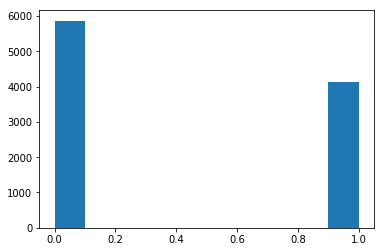

Dealer wins 59.0%
Player wins 41.0%


In [23]:
plt.hist(results)
plt.show()

games = len(results)
player_wins = sum(results)
dealer_wins = games - player_wins

print(f"Dealer wins {round((dealer_wins/games)*100)}%")
print(f"Player wins {round((player_wins/games)*100)}%")